### Мотивация
Определение положения беспилотников с помощью микрофонов. Микрофоны записывают звук, над звуком произоводится wavelet анализ, результаты отправляются в нейросеть, которая определяет наличие беспилотника.

### Описание задачи

1. Разбить аудио на промежутки 2-5 сек
2. Посчитать среднее по промежутку, вычесть из промежутка посчитанное среднее. Это нужно для исключения шумов ветра 
3. Произвести wavelet анализ промежутков, определить удобный базис и необходимую частоту дискретизации, отметить на wavelet-графе спектры беспилотников. Эти wavelet-графы отправятся в нейросеть.

Примерные времена пролета беспилотников:

- 18 сек
- 50 сек
- 90 cек
- 120 сек
- 160 сек

Будем анализировать интервал времени 18 - 20 сек

In [1]:
START = 18
END = 20

Вспомогательные функции

In [2]:
from PIL import Image
from os import listdir
from os.path import isfile, join
import time
import numpy as np
import matplotlib.pyplot as plt
import pywt
import wavio
from numpy.fft import rfft, rfftfreq
from utils import load_data, wavelet, filter_mean, imshow, print_imgs

In [ ]:
F, signal = load_data()
wavelet(signal, START, END, F, "Изначальный сигнал")

filtered_mean = filter_mean(signal, 5, 25, F)
wavelet(filtered_mean, START, END, F, "Отфильтрованный по среднему")

filtered_mean = filter_mean(signal, 5, 25, F, squares=True)
wavelet(filtered_mean, START, END, F, "Отфильтрованный по среднему квадратичному")

Видно, что звук коптера не различим!

## Попробуем отфильтровать сигнал с помощью КИХ ФВЧ
### Создание фильтра

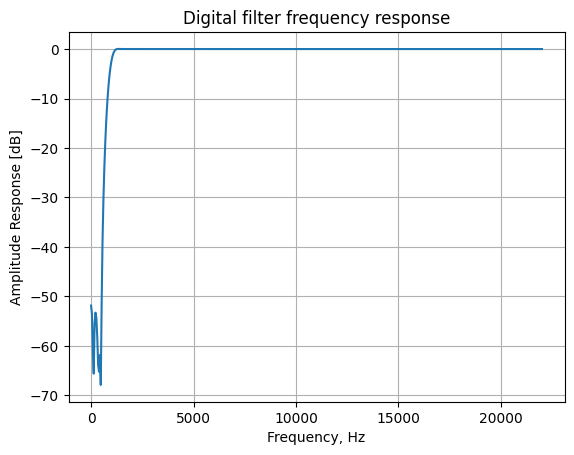

In [5]:
import scipy.signal
F, data = load_data()
b = scipy.signal.firwin(201, cutoff=F*0.02, fs=F, pass_zero='highpass')
w, h = scipy.signal.freqz(b, fs=F)

plt.title('Digital filter frequency response')
plt.plot(w, 20*np.log10(np.abs(h)))
plt.title('Digital filter frequency response')
plt.ylabel('Amplitude Response [dB]')
plt.xlabel('Frequency, Hz')
plt.grid()
plt.show()

### Применение фильтра

In [7]:
filtered = scipy.signal.lfilter(b, [1.0], data)
# sig = wavelet(filtered, START, END, F, "Отфильтрованный с помощью КИХ ФВЧ")

Вейвлет: 19.0 сек


In [9]:
wavio.write("data/out.wav", filtered, F, sampwidth=1)

Рассмотрим промежуток времени 50 - 53 сек

In [ ]:
wavelet(signal, 48, 53, F, "Изначальный сигнал", save=False)

plt.imshow(Image.open('48_53_init.png'))
plt.axis('off')

wavelet(filtered, 48, 53, F, "Отфильтрованный с помощью КИХ ФВЧ", save=False)

plt.imshow(Image.open('48_53_filtered.png'))
plt.axis('off')

# Сравнение всех графиков

In [ ]:
print_imgs()
Image.open('18_20_all.png')

wave
wave
wave
wave
wave
wave
wave
wave
wave


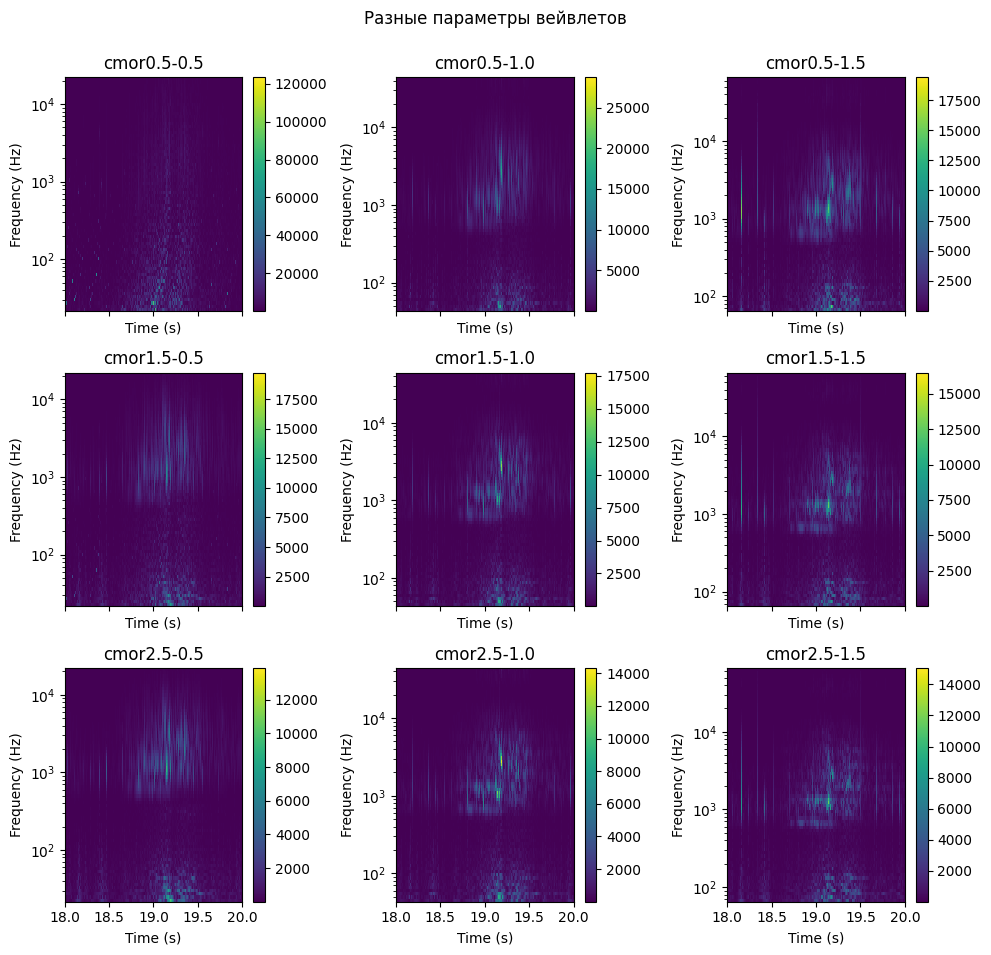